In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.integrate as integrate
from scipy import special

# Section 1 A little statistics


In [22]:
# B integrating the standard normal distribution.
result = stats.norm.cdf(1)
print(result)
result = stats.norm.cdf(2)
print(result)
result = stats.norm.cdf(5)
print(result)

0.8413447460685429
0.9772498680518208
0.9999997133484281


The results of sigma valus agree with the valuse on the z-table

In [23]:
# C a given probability determine the associated 'sigma' value
result = stats.norm.ppf(0.8413447460685429)
print(result)
result = stats.norm.ppf(0.9772498680518208)
print(result)
result = stats.norm.ppf(0.9999997133484281)
print(result)

1.0
2.0000000000000004
4.999999999970176


The results match with the probability on the z-table
No minus sign appeared 

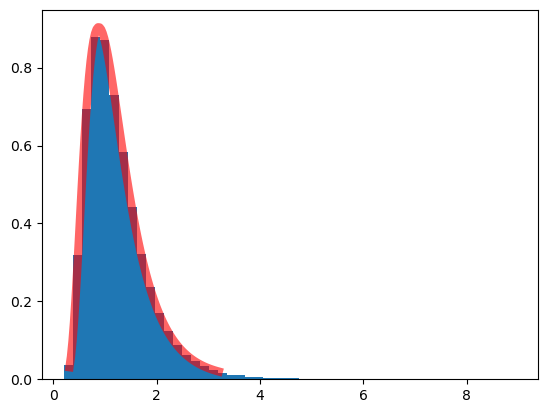

In [24]:
# 2
from scipy.stats import lognorm
fig, ax = plt.subplots(1, 1)

s = 0.5
d = stats.lognorm.rvs(s, loc = 0.1, scale = 1, size = 100000)
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.hist(d,50, density=True)
ax.plot(x, lognorm.pdf(x, s, loc = 0.1, scale = 1),
       'r-', lw=6, alpha=0.6, label='lognorm pdf')


plt.show()

The concept of the lognormal distribution is that the logarithms of the data follow the normal distribution. It's pretty straightforward that if x is normally distributed, then e^x is lognormally distributed 

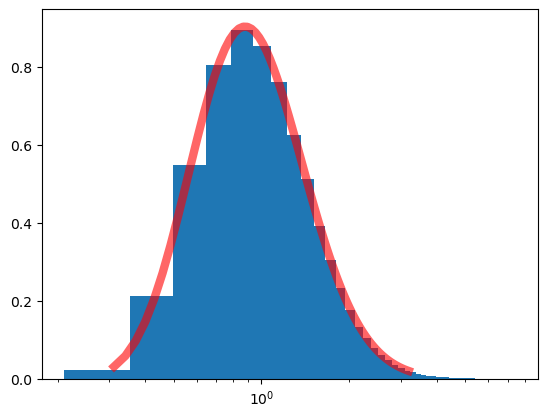

In [25]:
fig, ax = plt.subplots(1, 1)

s = 0.5
d = stats.lognorm.rvs(s, loc = 0.1, scale = 1, size = 100000)
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.hist(d,50, density=True)
ax.plot(x, lognorm.pdf(x, s, loc = 0.1, scale = 1),
       'r-', lw=6, alpha=0.6, label='lognorm pdf')
ax.set_xscale('log')

plt.show()

the above plot is normally distributed one thee scale of x-axis is in logarithmic scale

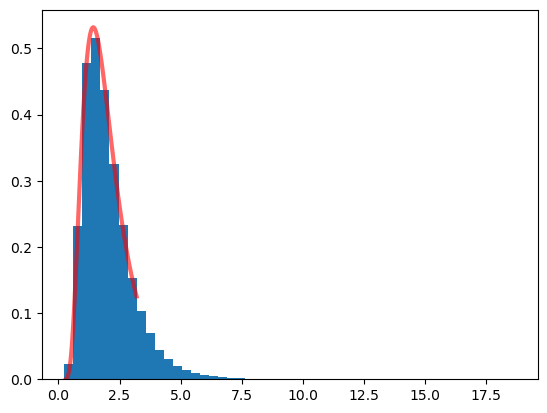

In [8]:
fig, ax = plt.subplots(1, 1)
s = 0.5
d = stats.lognorm.rvs(s, loc = 0.1, scale = 1.7, size = 100000)


x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.hist(d,50, density=True)
ax.plot(x, lognorm.pdf(x, s, loc = 0.1, scale = 1.7),
       'r-', lw=3, alpha=0.6, label='lognorm pdf')
plt.show()

Increasing the scale result a shift in peak to the right and a lower probability density

Q3 
A. A measurment value of 5

B. What is the probability that the data produces a signal that is equalliy or more signal-like than the measurment value of 5 given the data is in lognormal distribution and has the scale of 1. 

In [118]:
# D
pobability = stats.lognorm.cdf(5, s=1)
print(pobability)
# E
sigma = stats.norm.ppf(pobability)
print(sigma)

0.9462396895483368
1.6094379124340996


Q4

In [20]:
pobability = stats.lognorm.cdf(4, s=1)
sigma = stats.norm.ppf(pobability)
print(sigma)
pobability = stats.lognorm.cdf(3, s=1)
sigma = stats.norm.ppf(pobability)
print(sigma)
pobability = stats.lognorm.cdf(6, s=1)
sigma = stats.norm.ppf(pobability)
print(sigma)
pobability = stats.lognorm.cdf(7, s=1)
sigma = stats.norm.ppf(pobability)
print(sigma)

1.386294361119891
1.0986122886681096
1.7917594692280543
1.945910149055314


As the value of the measurment increases, the sigma also increase which means the probability is getting smaller. 

# Section 2 Non-Continous Distribution - Binomial

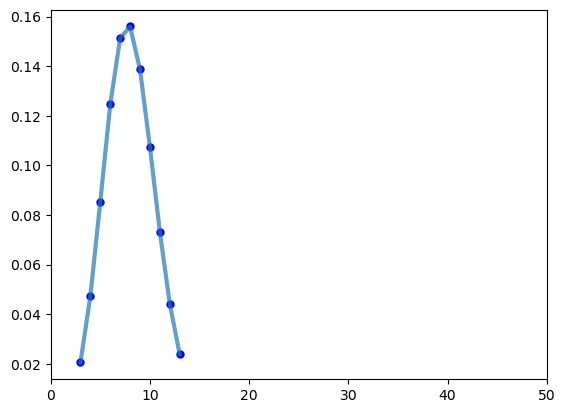

In [107]:
# B
from scipy.stats import binom
n, p = 40, 0.2
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
plt.xlim(0, 50)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.plot(x,stats.binom.pmf(x, n, p),linewidth = 3,alpha = 0.7)
plt.show()

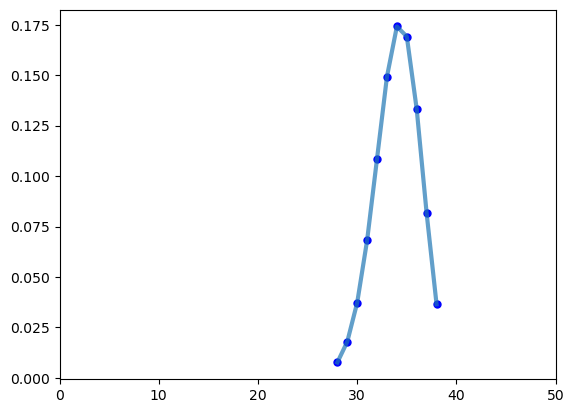

In [104]:
n, p = 40, 0.85
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
plt.xlim(0, 50)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.plot(x,stats.binom.pmf(x, n, p),linewidth = 3,alpha = 0.7)
plt.show()

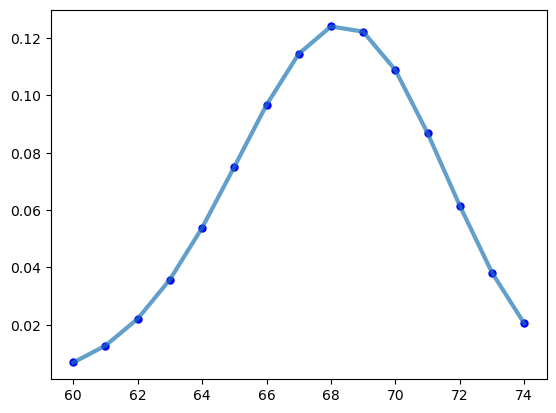

In [109]:
n, p = 80, 0.85
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.plot(x,stats.binom.pmf(x, n, p),linewidth = 3,alpha = 0.7)
plt.show()

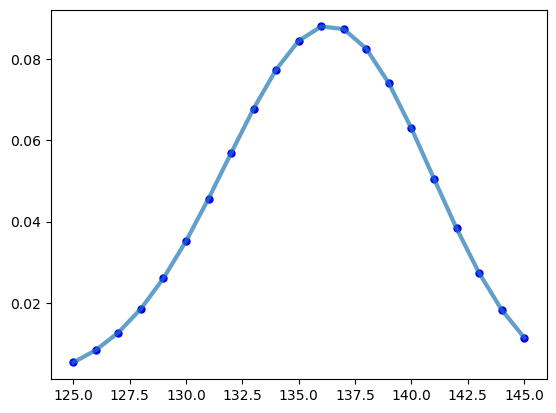

In [110]:
n, p = 160, 0.85
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.plot(x,stats.binom.pmf(x, n, p),linewidth = 3,alpha = 0.7)
plt.show()

Binominal has fixed number of trials and this distribution determins the priobability of observing a specified nummber of successful outcommes in a given number of trials. 
From the above plots, increasing p (probability of single success) causes the shift to the right, and increasing of n (numbe of trials) results the increment of the distribution width and the shift to the right as well

C. What is the probability that the data produces a signal that is equally or more signal-like in a binomial distribution given n = 160 and p= 0.85?

In [131]:
prob = binom.cdf(x, n = 160, p = 0.85)
print(prob)

[0.01284091 0.02119757 0.03387512 0.05239624 0.07843109 0.11361152
 0.15926551 0.21610243 0.28390787 0.36132751 0.44582006 0.53383313
 0.62120378 0.70372049 0.77772829 0.84063492 0.89119817 0.92953603
 0.95688192 0.97517581 0.98661475]
[-2.23098962 -2.02962045 -1.82666438 -1.62205075 -1.415704   -1.20754314
 -0.99748114 -0.78542428 -0.57127133 -0.35491266 -0.13622916  0.08490901
  0.30864387  0.53513138  0.76454352  0.99707078  1.23292524  1.47234427
  1.71559519  1.96298105  2.21484804]


In [132]:
# D
sigma = stats.norm.ppf(prob)
print(sigma)

[-2.23098962 -2.02962045 -1.82666438 -1.62205075 -1.415704   -1.20754314
 -0.99748114 -0.78542428 -0.57127133 -0.35491266 -0.13622916  0.08490901
  0.30864387  0.53513138  0.76454352  0.99707078  1.23292524  1.47234427
  1.71559519  1.96298105  2.21484804]


Since discrete distribution has probability distribution that depicts the occurence of discrete outcome, the trials are independent which the outcome on one trial does not affect the outcome on other tials in binominal distribution. 

E. The mean of a discrete random variable X is a weighted average of the possible values that the random variable can take, which gives each observation equal weight. Therefore, the parameters makes sense each outcome are weighted according to its corresponding probability.